<h1 style="direction: rtl"> <b> תרגול 8: תהליך רייט-פישר ותהליך מורן </b> </h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng=np.random.default_rng(18_12_22)

## <div style="direction: rtl"> מודל רייט-פישר </div> ##

<div style="direction: rtl"> במודל רייט פישר, יש לנו אוכלוסיה בגודל N. ובכל צעד זמן אנחנו מחליפים כל פרט בהורה אקראי מתוך הדור הקודם (דגימה של הדור הקודם עם החלפה). <br> זאת אומרת, אם בדור הקודם יש 10 A ו-11 a,  הסיכוי שההורה של הראשון בדור הבא להיות A הוא 10/21, ושההורה הוא a הוא 11/21, הסיכוי שהשני הוא A הוא 10/21, הסיכוי שהשלישי הוא A הוא 10/21, וכן הלאה.
</div>

### <div style="direction: rtl"> סימולצית אינדבידואלים/סוכנים Individual/Agent-Based simulation </div> ###

<div style="direction: rtl"> נעשה סימולציית אינדיבידואלים.סוכנים: במקרה הזה, הדבר היחיד שמגדיר את הפרטים הוא האלל שלהם <code>'A'</code> או <code>'a'</code>, אז נייצר כל פרט באמצעות תו:</div>

In [2]:
rng=np.random.default_rng(17_12_22)

<div style="direction: rtl"> ניקח אוכלוסייה של 24 פרטים כשחצי מהם עם כל אלל</div>

In [3]:
N=24
p=1/2

num_A = int(p*N)
num_a = N-num_A
population = ['A']*(num_A)+['a']*(num_a)
population=np.array(population) # make sure it's an array
print(population)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'a' 'a' 'a' 'a' 'a' 'a'
 'a' 'a' 'a' 'a' 'a' 'a']


<div style="direction: rtl"> צעד אחד במודל רייט פישר: נשתמש ב-<code>rng.choice</code> כדי לדגום את האוכלוסייה: 
</div>

In [4]:
# get random choice from population
rng.choice(population)

'a'

In [5]:
new_population = [rng.choice(population) for x in population]
print(new_population)

['A', 'A', 'A', 'A', 'A', 'a', 'A', 'a', 'a', 'a', 'a', 'A', 'a', 'a', 'A', 'a', 'a', 'a', 'A', 'A', 'A', 'A', 'a', 'a']


<div style="direction: rtl"> אם היה לנו יחס fitness, צריך לדגום כל פרט עם המשקל המתאים 
</div>

In [6]:
WA, Wa = 0.9,0.2
pop_W = np.where(population=='A',WA,Wa)
print(pop_W)
p_parent = pop_W/pop_W.sum() # normalize
new_population = [rng.choice(population,p=p_parent) for cell in population]
print(new_population)

[0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2]
['a', 'A', 'A', 'A', 'A', 'A', 'A', 'a', 'A', 'a', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'a', 'A']


<div style="direction: rtl"> בינתיים לא נתייחס לfitness, ונניח שלשני האללים יש אותו כושר שרידות. 
</div>

<div style="direction: rtl"> נייצר סימולציות בצבר של 200: 
</div>

In [7]:
N_sims = 200
N=24
p=1/2

num_A = int(p*N)
num_a = N-num_A
population = ['A']*(num_A)+['a']*(num_a)
populations = np.array([population for _ in range(N_sims)])

In [8]:
populations[20]

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a'], dtype='<U1')

<div style="direction: rtl"> לצערי, לא מצאתי דרך יעילה להשתמש ב-choice בצבר: כרגע הסיכוי לכל פרט הוא זהה, אז אפשר לבחור הורה אקראי באמצעות האינדקס. 
</div>

<div style="direction: rtl"> נבחר את האוכלוסייה הבאה האמצעות <code>rng.integers</code>:<br> האוכלוסיות נמצאות בשורות של מערך: populations, המערך החדש יהיה באותו גודל, כשהאינדקס של השורה נשאר אותו דבר והאינדקס של העמודה נלקח רנדומלית 
</div>

$$\text{Pop}\left(0\right) = \left(\begin{matrix} A_{0,0} & A_{0,1} & \ldots & A_{0,N} \\ A_{1,0} & A_{1,1} & \ldots & A_{1,N} \end{matrix}\right) $$

$$\text{Pop}\left(1\right) = \left(\begin{matrix} A_{0,1} & A_{0,4} & \ldots & A_{0,1} \\ A_{1,3} & A_{1,0} & \ldots & A_{1,6} \end{matrix}\right) $$

<div style="direction: rtl"> עד עכשיו ראינו שני סוגים של אינדקסים: <ul> <li> אינדקס בסיסי: מספרי או חיתוכים של מימד </li></ul> 
</div>

$$\left(
    \begin{matrix} 0.2 & 0 \\ 0.3 & 0 \\ 0.4 & 0 \\ 0.5 & 0 \end{matrix}
    \right) \left[
        1::2, 0
    \right] =  
    \left(
    \begin{matrix} 
        0.3 \\ 0.5
    \end{matrix}
    \right) $$


In [9]:
pop=np.array([['A','a','u','U'], # population in simulation 1 (replica 1)
              ['B','b','p','P'], # population in simulation 2 (replica 2)
              ['C','c','k','K']])# population in simulation 3 (replica 3)
pop[::2,1] # every 2nd row, second column

array(['a', 'c'], dtype='<U1')

<div style="direction: rtl"> <ul> <li> אינדקס בוליאני: מערך של True False שנותן חזרה את כל המקומות בהם המערך True </li></ul>
    התוצאה היא מערך חדש, רק של הערכים התואמים ל-True
</div>

$$\left(
    \begin{matrix} 0.2 \\ 0.3 \\ 0.4 \\ 0.5 \end{matrix}
    \right) \left[
        \left(
        \begin{matrix} True \\ False \\ False\\ True \end{matrix}
        \right)
    \right] =  
    \left(
    \begin{matrix} 
        0.2 \\ 0.5
    \end{matrix}
    \right) $$


In [10]:
is_Aubg = (pop=='A') | (pop=='u') | (pop=='b') | (pop=='g')
is_Aubg, pop[is_Aubg]

(array([[ True, False,  True, False],
        [False,  True, False, False],
        [False, False, False, False]]),
 array(['A', 'u', 'b'], dtype='<U1'))

<div style="direction: rtl"> והסוג ה"חדש": <ul> <li> אינדקס מתקדם: נותנים מערך של אינדקסים (בגודל קבוע) לכל מימד, מקבלים מערך חדש בגודל הזה </li></ul> 
</div>

$$\left(
    \begin{matrix} 0.2 \\ 0.3 \\ 0.4 \\ 0.5 \end{matrix}
    \right) \left[
        \left(
        \begin{matrix} 1 & 0 \\ 0 & 3 \end{matrix}
        \right)
    \right] =  
    \left(
    \begin{matrix} 
        0.3 & 0.2 \\ 0.2 & 0.5
    \end{matrix}
    \right) $$


In [11]:
# want a 2x4 array
# [[pop[0,3], pop[1,3],pop[2,1], pop[0,1]],
#  [pop[1,2], pop[2,2]], pop[0,0], pop[1,0] ]
#
rows = np.array( [[0,1,2,0],
                  [1,2,0,1]])
cols = np.array( [[3,3,1,1],
                  [2,2,0,0]])
print(pop)
pop[rows,cols]

[['A' 'a' 'u' 'U']
 ['B' 'b' 'p' 'P']
 ['C' 'c' 'k' 'K']]


array([['U', 'P', 'c', 'a'],
       ['p', 'k', 'A', 'B']], dtype='<U1')

<div style="direction: rtl"><br> בשביל לעשות את הדגימה האקראית הכל אוכלוסייה נייצר שני מערכים שיתנו את האינדקס <code>[rows,ints]</code>: <br> <code>rows</code> יתן את השורה לכל ערך, שנשארת אותו דבר כי לוקחים הורה מאותה שורה/אוכלוסייה, ו-<code>ints</code> יתן אינדקס אקראי בין 0 ל-N שדוגם באקראי מכל השורה/אוכלוסייה 
</div>

$$\text{rows} = \left(\begin{matrix} 0 & 0 & \ldots & 0 \\ 1 & 1 & \ldots & 1 \end{matrix}\right) $$

$$\text{ints}= \left(\begin{matrix} 1 & 4 & \ldots & 1 \\ 3 & 0 & \ldots & 6 \end{matrix}\right) $$

<div style="direction: rtl"> ונכניס בתור אינדקס 
</div>

$$\text{Pop}\left(0\right)\left[\text{rows},\text{ints}\right] =  \left(\begin{matrix} A_{0,1} & A_{0,4} & \ldots & A_{0,1} \\ A_{1,3} & A_{1,0} & \ldots & A_{1,6} \end{matrix}\right) $$


In [12]:
pop=np.array([['A','a','u','U'], # population in simulation 1 (replica 1)
              ['B','b','p','P'], # population in simulation 2 (replica 2)
              ['C','c','k','K']])# population in simulation 3 (replica 3)
n,l = pop.shape
cols, rows = np.meshgrid(np.arange(l),np.arange(n)) # special function to make this kind of grid easy
ints = rng.integers(0,l,(n,l))
print(cols)
print(rows)
print(ints)
pop[rows,ints]

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]
[[3 3 2 3]
 [0 1 2 1]
 [2 1 0 0]]


array([['U', 'U', 'u', 'U'],
       ['B', 'b', 'p', 'b'],
       ['k', 'c', 'C', 'C']], dtype='<U1')

<div style="direction: rtl"> נייצר סוף סוף את הסימולציה: 
</div>

In [13]:
N_sims = 200
N=24
p=1/2

num_A = int(p*N)
num_a = N-num_A
population = ['A']*(num_A)+['a']*(num_a)
populations = np.array([population for _ in range(N_sims)])
cols, rows = np.meshgrid(np.arange(N),np.arange(N_sims))

<div style="direction: rtl"> בעקרון אמורים לעשות לולאת while, אבל תמיד כדאי לשים גבול על כמות האיטרציות: נשתמש בrange מאוד גדול ונצא עם break כשהגענו למצב סטטי. 
</div>


In [14]:
MAX_ITERATIONS=2_000
fracs = np.zeros((MAX_ITERATIONS+1,N_sims))
fracs[0,:] = (populations=='A').mean(axis=1)

for t in range(MAX_ITERATIONS):
    ints = rng.integers(0,N,(N_sims,N))
    populations = populations[rows,ints]
    fracs[t+1,:] = (populations=='A').mean(axis=1)
    if np.isin(fracs[t+1,:],[1,0]).all(): # all sims either 1 (A only) or 0 (a only)
        break

# cut the irrelevant extra time
fracs = fracs[:t+2,:].copy()

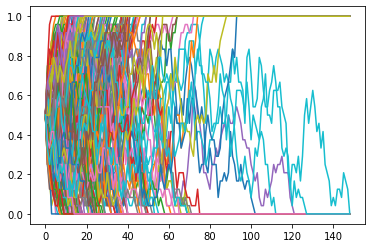

In [15]:
plt.plot(fracs)
plt.show()

<div style="direction: rtl"> נחפש מה הסתברות לקיבוע של A וכמה זמן בממוצע זה לקח: 
</div>

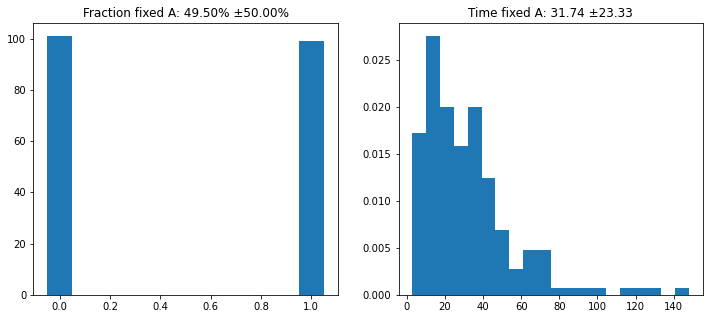

In [16]:
fix_frac = fracs[-1,:]
fix_time = (~np.isin(fracs,[0,1])).sum(axis=0)

fix_frac_label = f"Fraction fixed A: {np.mean(fix_frac):.2%} ±{np.std(fix_frac):.2%}"
fix_time_label = f"Time fixed A: {np.mean(fix_time):.4} ±{np.std(fix_time):.4}"

#plot
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].hist(fix_frac, bins=[-0.05,.05, 0.95,1.05])
axes[0].set_title(fix_frac_label)
axes[1].hist(fix_time,bins=20, density=True)
axes[1].set_title(fix_time_label)
plt.show()

<div style="direction: rtl"> באופן לא מפתיע, חצי מהפעמים A התקבע וחצי מהפעמים a התקבע. מה שיותר מעניין זה שהזמן שלקח להגיע לקיבוע מתפלג יחסית רחב, 33 צעדים פלוס מינוס 25, ועם זנב ארוך של זמנים ארוכים. <br> אפשר לצייר את התפלגות אחוז ה-A בזמן ולראות את ההתקדמות
</div>


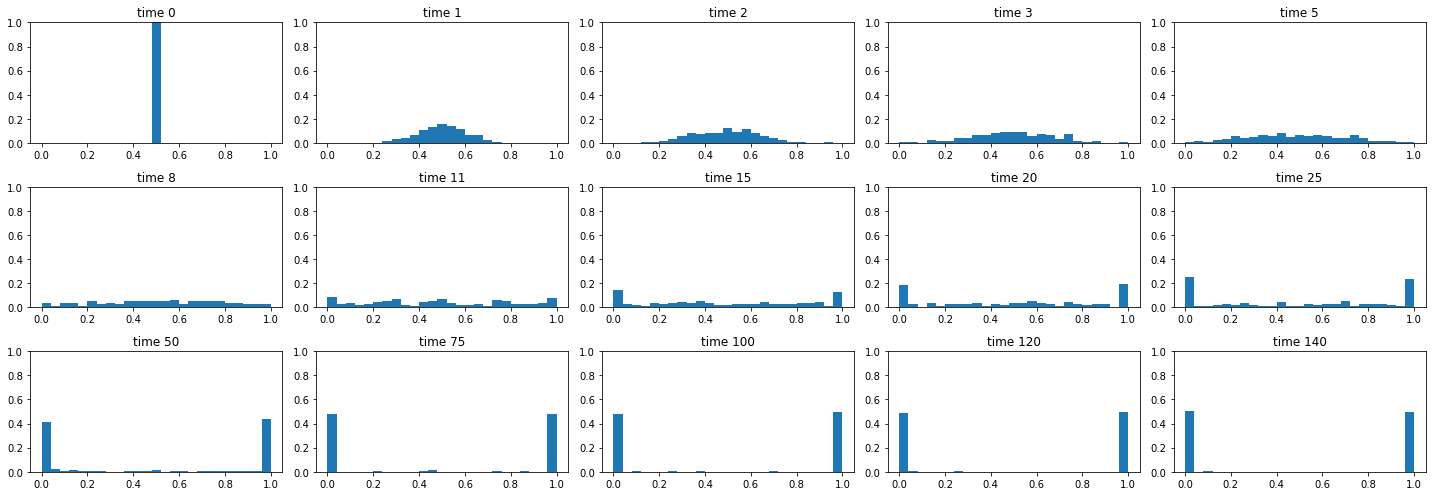

In [17]:
fig, axes = plt.subplots(3,5,figsize=(20,7))
times = [0,  1,  2,  3, 5,
         8, 11, 15, 20, 25, 
         50, 75, 100, 120,140]

for t,axe in zip(times,axes.flat):
    axe.hist(fracs[t,:],bins=N+1,weights=np.ones(N_sims)/N_sims,range=(0,1))
    axe.set_title(f'time {t}')
    axe.set_ylim(0,1)
plt.tight_layout()
plt.show()

### <div style="direction: rtl"> סימולצית תדירות frequency-based simulation </div> ###

<div style="direction: rtl"> נעשה משהו אפילו יותר פשוט. נשמור רק את יחס האללים p בכל שלב, בגלל שבשלב הדגימה לדור הבא לא היה אכפת איפה נמצא כל פרט במערך ואין הבדל בין פרטים עם אותה גנטיקה, אז הדבר היחיד שמשפיע על הדור הבא הוא אחוז ה-A באוכלוסייה:<br> אם בדור הנוכחי של $p$ פרטים עם אלל A, הסיכוי שבדור הבא יהיו $p^\prime$ פרטים עם אלל A נובע מהתפלגות בינומיאלית, כי לכל פרט באוכלוסייה החדשה יש סיכוי $p$ בלתי תלוי לקבל A וכמות הפרטים $k$ שנהיו A נותנת את השבר בדור החדש $k=n p^\prime$ 
</div>

$$ p\left(t+1\right)\sim \text{Binom}\left(p=p\left(t\right),k=N p\left(t+1\right), N\right)$$

$$ \sim \binom{N}{N p\left(t+1\right)}\;p\left(t\right)^{N p\left(t+1\right)}\left(1-p\left(t\right)\right)^{N\left(1 -  p\left(t+1\right)\right)}$$


<div style="direction: rtl"> במקרה שיש fitness, נשנה את הסיכוי להורה לפי יחס כושר השרדות.</div>

$$ p\left(t+1\right)\sim \text{Binom}\left(\frac{W_A}{W_A p\left(t\right)+W_a \left(1-p\left(t\right)\right)}p\left(t\right),N p\left(t+1\right), N\right)$$


<div style="direction: rtl"> הגנרטור הפסואדו-אקראי בא עם פונקציה להגרלת מספר אקראי מהתפלגות בינומיאלית. 
</div>

In [18]:
rng=np.random.default_rng(17_12_22)

<div style="direction: rtl"> נייצר צבר של 200 סימולציות:. 
</div>

In [19]:
N_sims = 200
N=24
p=0.5

In [20]:
MAX_ITERATIONS=2_000
fracs = np.zeros((MAX_ITERATIONS,N_sims))
fracs[0,:]=p

for t in range(MAX_ITERATIONS-1):
    fracs[t+1,:]=rng.binomial(N, fracs[t,:])/N
    if np.isin(fracs[t+1,:],[1,0]).all(): # all finished
        break

# cut the irrelevant extra time
fracs = fracs[:t+2,:]

<div style="direction: rtl"> נחזור על אותה אנליזה שעשינו קודם: 
</div>

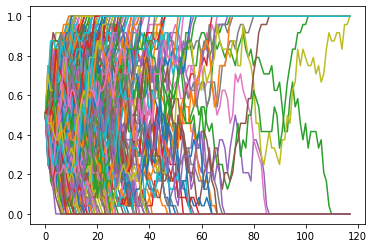

In [21]:
plt.plot(fracs)
plt.show()

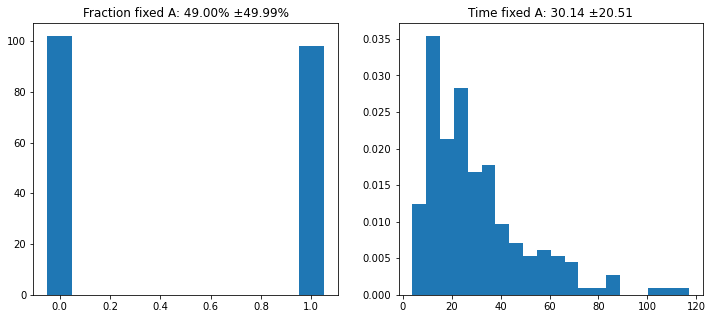

In [22]:
fix_frac = fracs[-1,:]
fix_time = (~np.isin(fracs,[0,1])).sum(axis=0)

fix_frac_label = f"Fraction fixed A: {np.mean(fix_frac):.2%} ±{np.std(fix_frac):.2%}"
fix_time_label = f"Time fixed A: {np.mean(fix_time):.4} ±{np.std(fix_time):.4}"

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].hist(fix_frac, bins=[-0.05,.05, 0.95,1.05])
axes[0].set_title(fix_frac_label)
axes[1].hist(fix_time,bins=20, density=True)
axes[1].set_title(fix_time_label)
plt.show()

<div style="direction: rtl"> רואים שקיבלנו ערכים די דומים לסימולציה מקודם: 
</div>

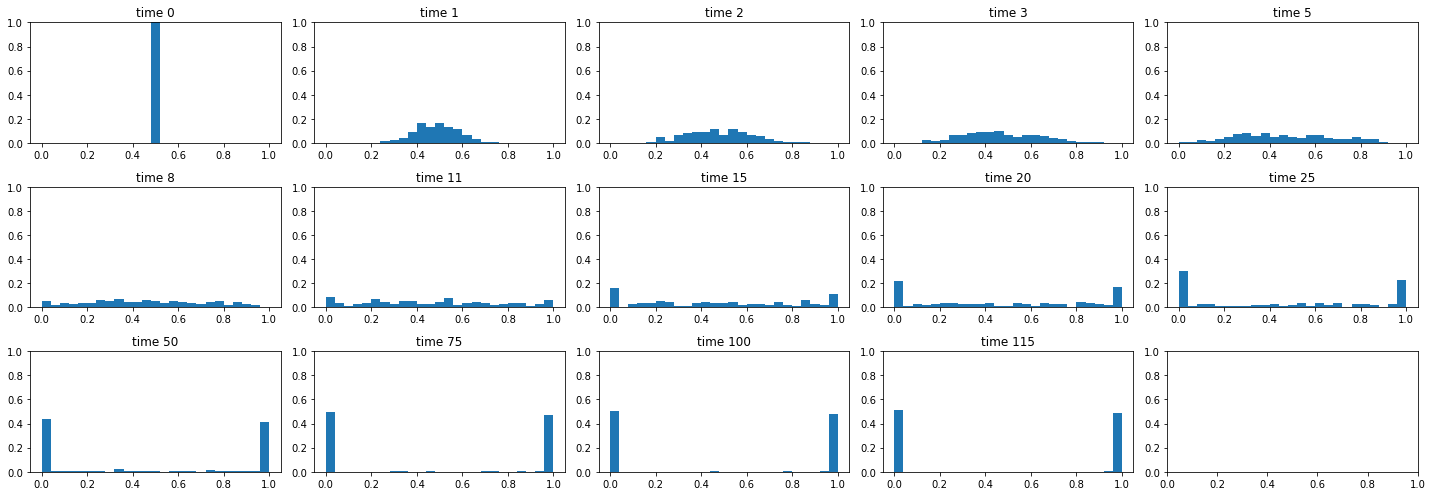

In [23]:
fig, axes = plt.subplots(3,5,figsize=(20,7))
times = [0,  1,  2,  3, 5, 8, 11,  
         15, 20, 25, 50, 
        75, 100, 115]
for t,axe in zip(times,axes.flat):
    dist = []
    n=0
    for i in range(N_sims):
        if fix_time[i]<=t:
            dist.append(fracs[-1,i])
        else:
            dist.append(fracs[t,i])
        n+=1
    axe.hist(dist,bins=N+1,weights=np.ones(n)/n,range=(0,1))
    axe.set_title(f'time {t}')
    axe.set_ylim(0,1)
plt.tight_layout()
plt.show()

---

## <div style="direction: rtl"> מודל מורן </div> ##

<div style="direction: rtl"> בהרצאה ראינו את מודל מורן, בו יש לנו אוכלוסייה קבועה עם תדירות אללים A של p ותדירות אללים a של q. <br> בכל פרק זמן, פרט אקראי אחד מת, ופרט אקראי מתרבה.
</div>

### <div style="direction: rtl"> סימולצית אינדבידואלים/סוכנים Individual/Agent-Based simulation </div> ###

<div style="direction: rtl">בשביל כל פרט נייצר אוביקט (הסוכן agent) מתוך מחלקה (class) שמתארת את התנהגות הסוכן. בכל צעד זמן נעבור על הסוכנים ונעדכן אותם.
</div>

In [24]:
class Haploid_Agent:
    """A haploid creature with genetics (string e.g. 'A') and an age"""

    def __init__(self, genetics):
        self.gen=genetics
        self.age=0

<div style="direction: rtl">קריאה למחלקה <code>Haploide_Agent</code> מייצרת אובייקט עם שני שדות: גנטיקה וגיל, כשהגיל מאותחל לאפס.
</div>

In [25]:
A = Haploid_Agent('A')
A,A.gen,A.age

(<__main__.Haploid_Agent at 0x7f16ef812a30>, 'A', 0)

<div style="direction: rtl">כרגע כשאנחנו פשוט מסתכלים על <code>A</code>, אנחנו מקבלים שם ארוך שמכיל את המחלקה ואת המקור שלה <code>__main__.Haploid_Agent</code> ומספר סידורי ייחודי id.
</div>

In [26]:
hex(id(A))

'0x7f16ef812a30'

<div style="direction: rtl"> נוסיף עוד כמה תכונות למחלקה: חוץ ממאתחל __init__, נוסיף שיטה (method) של __repr__ שתיתן לנו הצגה יותר נחמדה, ושיטה שתייצג את התנהגות מיטוזה: <br> נייצג את זה שהתא מתחלק לשני תאי-בת על ידי זה שנאתחל את הגיל ל-0 (תא בת ראשון) ונייצר ונחזיר אובייקט חדש (תא הבת השני) עם אותה גנטיקה</div>

In [27]:
class Haploid_Agent:

    def __init__(self,genetics: str, age=0):
        self.gen=genetics
        self.age=age

    def mitosis(self):
        self.age=0
        return Haploid_Agent(self.gen)

    def __repr__(self):
        age_label=f', age={self.age}' if self.age>0 else ''
        return f'Haploid_Agent({repr(self.gen)}{age_label})'

<div style="direction: rtl">הצגת __repr__ טובה בדרך כלל נותנת את הקוד לייצר מחדש את האוביקט
</div>

In [28]:
A = Haploid_Agent('A')
print(A)
A.age+=1
A

Haploid_Agent('A')


Haploid_Agent('A', age=1)

In [29]:
B=Haploid_Agent('A', age=1)
C=A
A,id(A),B,id(B),C,id(C)

(Haploid_Agent('A', age=1),
 139736585677936,
 Haploid_Agent('A', age=1),
 139736484132752,
 Haploid_Agent('A', age=1),
 139736585677936)

<div style="direction: rtl"><br>יצרנו אובייקט חדש B עם אותן תכונות, אבל הוא שונה! זה בניגוד ל-C שיצרנו עם <code>C=A</code>, שהוא עם אותו id. רוב האובייקטים הם mutable, כמו רשימה, כך שגם A וגם C מצביעים על אותו אובייקט, ושינויים ב-C ישנו גם את A.</div>


In [30]:
C is A, B is A

(True, False)

In [31]:
A.age=2
# A.age=1 C.age=2 B.age=3
A.age,B.age,C.age

(2, 1, 2)

<div style="direction: rtl"><br>עכשיו שיש לנו מחלקה שמייצגת את התאים, נייצר רשימה שלהם ש-$p$ מהם עם גנטיקה של אלל A והשאר עם גנטיקה של אלל a, ונייצר מזה את האובייקטים שמייצגים את התאים ממש. 
</div>


In [32]:
N=24
p=1/2

num_A = int(p*N)
num_a = N-num_A
allels = ['A']*(num_A)+['a']*(num_a)
print(allels)
population=[Haploid_Agent(allel) for allel in allels]
print(population)

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
[Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a')]


<div style="direction: rtl"><br>יצרנו אוכלוסייה של תאים: כל צעד נבחר אחר שיתרבה $i$ ואחד שימות $j$: נשתמש בשיטה <code>()mitosis.</code> לאחד המתרבה ונחליף את האובייקט ב-$j$ אם האובייקט החדש שהשיטה יצרה. 
</div>


In [33]:
# time step
i, j = rng.integers(N,size=2)
population[j] = population[i].mitosis()
#
print(i,j)
print(population)

6 16
[Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('A'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('A'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a'), Haploid_Agent('a')]


<div style="direction: rtl"><br>נשתמש ב-<code>plt.scatter</code> כדי לצייר את התאים: הפונקציה מציירת נקודות בגדלים וצבעים שונים. 
</div>


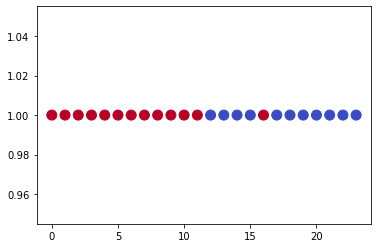

In [34]:
xs = np.arange(N) # put the cells in a line
ys = np.ones(N)   # of the same height
sizes = 100       # the same size
colors = ['A' in cell.gen for cell in population]
# colors array is 0 for A and 1 for a: this is mapped to blue and red
cmap_rb='coolwarm'

plt.scatter(xs,ys,s=sizes,c=colors,cmap=cmap_rb)
plt.show()

<div style="direction: rtl">  נכניס את הצעד ואת הציור לפונציות </div>

In [35]:
def moran_step(population):
    for cell in population:
        cell.age+=1
    i, j = rng.integers(N,size=2)
    population[j] = population[i].mitosis()
    return i,j


rb = plt.cm.coolwarm((0,512)) # first and last colors of 'coolwarm'
def plot_pop(pop,t=0):
    plt.scatter(np.arange(len(pop)),
                np.ones(len(pop))*t,
                s=100,
                c=rb[[('A' in cell.gen)+0 for cell in pop]],
                )

def plot_change(t,i,j):
    # also picture which cells died and breeded last timestep
    plt.plot(i,t-1,color='lime',marker='o',markersize=15,markerfacecolor='none')
    plt.plot(j,t-1,c='k',marker='x',markersize=15)
    plt.plot(j,t,color='k',marker='o',markersize=15,markerfacecolor='none')
    plt.annotate('',(j-0.05,t-0.05),xytext=(i+0.05,t-0.95),color='k',size=10,arrowprops=dict(arrowstyle="simple",color='k',connectionstyle="arc3"))



<div style="direction: rtl"> נשמור את כל האוכלוסיות בעבר</div>

In [36]:
# save copy in history
hist_populations=[ [Haploid_Agent(cell.gen,cell.age) for cell in population] ]

<div style="direction: rtl"> נעשה צעד ונצייר את הסימולציה עד עכשיו</div>

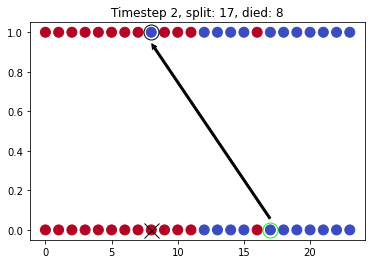

In [37]:
#ctrl shift to step

# plot all previous populations
for t in range(len(hist_populations)):
    plot_pop(hist_populations[t],t)

# do one timestep and save copy in history
i,j = moran_step(population)
hist_populations.append([Haploid_Agent(cell.gen,cell.age) for cell in population])

# plot new population and
plot_pop(population, t+1)
plot_change(t+1,i,j)
plt.title(f"Timestep {len(hist_populations)}, split: {i}, died: {j}")
plt.show()

<div style="direction: rtl">נעשה סימולציה רצינית יותר: נריץ בלולאה עד שנגיע למצב יציב (כולם A או כולם a ) ונחשב סטטיסטיקות באמצע. 
</div>


In [38]:
N_sims = 200

N=24
p=1/2

num_A = int(p*N)
num_a = N-num_A
allels = ['A']*(num_A)+['a']*(num_a)
population=[[Haploid_Agent(allel) for allel in allels] for i in range(N_sims)]

ages_sum=0
frac = num_A/N
fracs = [[frac] for i in range(N_sims)]
ages = [[ages_sum/N] for i in range(N_sims)]

done = [False for i in range(N_sims)]

MAX_ITERATIONS=20_000
for t in range(MAX_ITERATIONS):
    for i in range(N_sims):
        if done[i]: # נדלג על סימוציות שנגמרו
            pass
        else:
            moran_step(population[i])
            ages_sum = sum(cell.age for cell in population[i])
            ages[i].append(ages_sum/len(population[i]))
            num_A = sum(cell.gen.count('A') for cell in population[i])
            frac = num_A/len(population[i])
            fracs[i].append(frac)

            if frac in (0, 1):
                # all A or all a
                done[i]=True

    # if all simulations are done
    if all(done):
        break

<div style="direction: rtl"> נצייר את שבר ה-A לכל סימולציה ואת הגיל הממוצע לפרט</div>

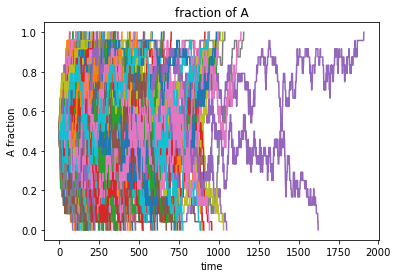

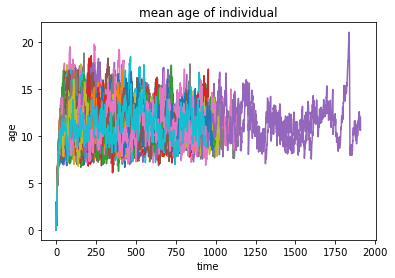

In [39]:
for frac in fracs:
    plt.plot(frac)
plt.title('fraction of A')
plt.xlabel('time')
plt.ylabel('A fraction')
plt.show()
for age in ages:
    plt.plot(age)
plt.title('mean age of individual')
plt.xlabel('time')
plt.ylabel('age')
plt.show()

<div style="direction: rtl"> נחזור על הסטטיסטיקות שעשינו קודם, ונוסיף את הגיל של הפרטים </div>

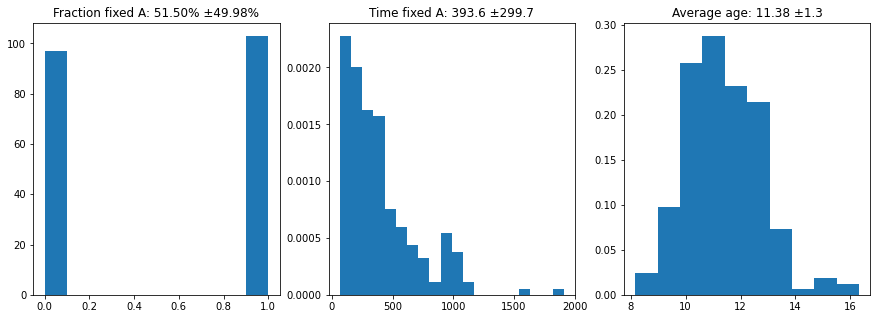

In [40]:
fix_frac = [frac[-1] for frac in fracs]
fix_time = [len(frac) for frac in fracs]
last_ages = [np.mean(age[-10:]) for age in ages]

fix_frac_label = f"Fraction fixed A: {np.mean(fix_frac):.2%} ±{np.std(fix_frac):.2%}"
fix_time_label = f"Time fixed A: {np.mean(fix_time):.4} ±{np.std(fix_time):.4}"
age_label = f"Average age: {np.mean(last_ages):.2f} ±{np.std(last_ages):.2}"

fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].hist(fix_frac)
axes[0].set_title(fix_frac_label)
axes[1].hist(fix_time,bins=20, density=True)
axes[1].set_title(fix_time_label)
axes[2].hist(last_ages, density=True)
axes[2].set_title(age_label)
plt.show()

<div style="direction: rtl"> גם פה A התקבע בתדירות של חצי, והזמן לקיבוע יחסית רחב: צריך לזכור שזמן הסימולציה פה לא תואם, ולכן אין דרך ברורה לעבור מהתוצאה כאן לתוצאה הקודמת. הגיל הממוצע של פרט משתנה הרבה פחות, ומתייצב סביב 12 פלוס מינוס דור, כנראה בגלל שהסיכוי של כל פרט להבחר למוות/מיטוזה מתוך האוכלוסייה של 24 ולאבד את הגיל שלו הוא בערך 1/24.
</div>


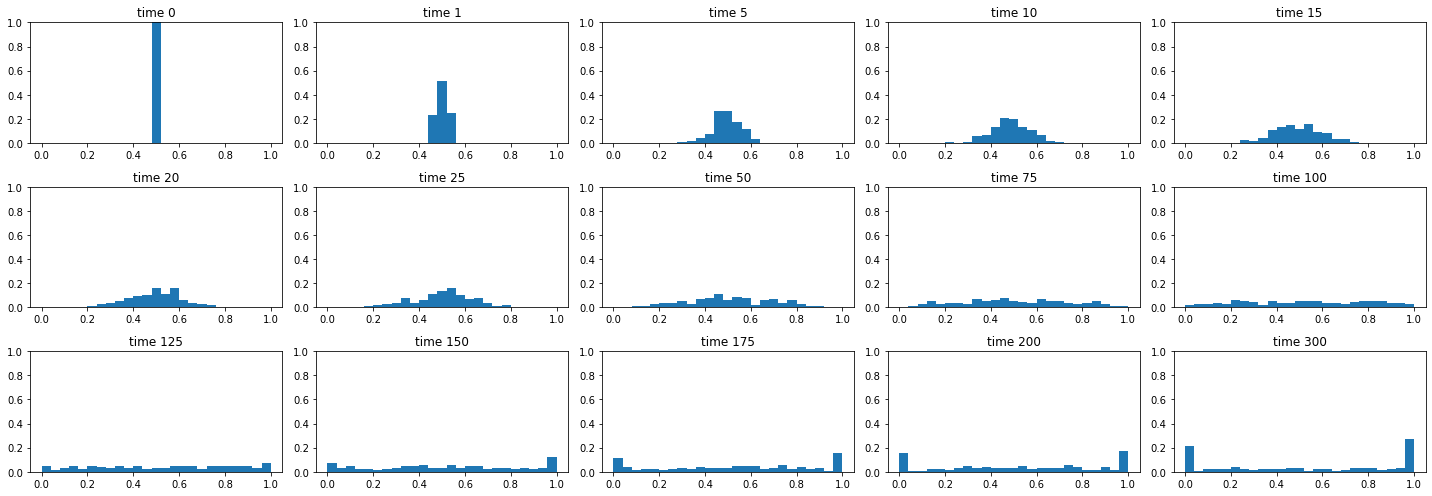

In [41]:
fig, axes = plt.subplots(3,5,figsize=(20,7))
times = [0,  1,  5,  10, 15, 
         20, 25, 50, 75, 100,
        125, 150, 175, 200, 300]
for t,axe in zip(times,axes.flat):
    dist = []
    n=0
    for i in range(N_sims):
        if fix_time[i]<=t:
            dist.append(fracs[i][-1])
        else:
            dist.append(fracs[i][t])
        n+=1
    axe.hist(dist,bins=N+1,weights=np.ones(n)/n,range=(0,1))
    axe.set_title(f'time {t}')
    axe.set_ylim(0,1)
plt.tight_layout()
plt.show()